In [2]:
%matplotlib inline
import sys
sys.path.append("../")
from tools import load_obj
import matplotlib.pyplot as plt
import numpy as np

In [3]:
task_complexities = [0, 2, 8, 26, 80]
depths = [1, 2, 4, 8, 16]

DATA = {f"Task-{task_complexity}":[] for task_complexity in task_complexities}

for task_complexity in task_complexities:
    data_dict = load_obj(f"./data/task_{task_complexity}_data.bin")
    for depth in depths:
        DATA[f"Task-{task_complexity}"].append(data_dict["train"]["std_new"][depth]/data_dict["train"]["std_teacher"][depth])

DATA_transpose = [[DATA[model][i] for model in DATA.keys()] for i in range(5)]

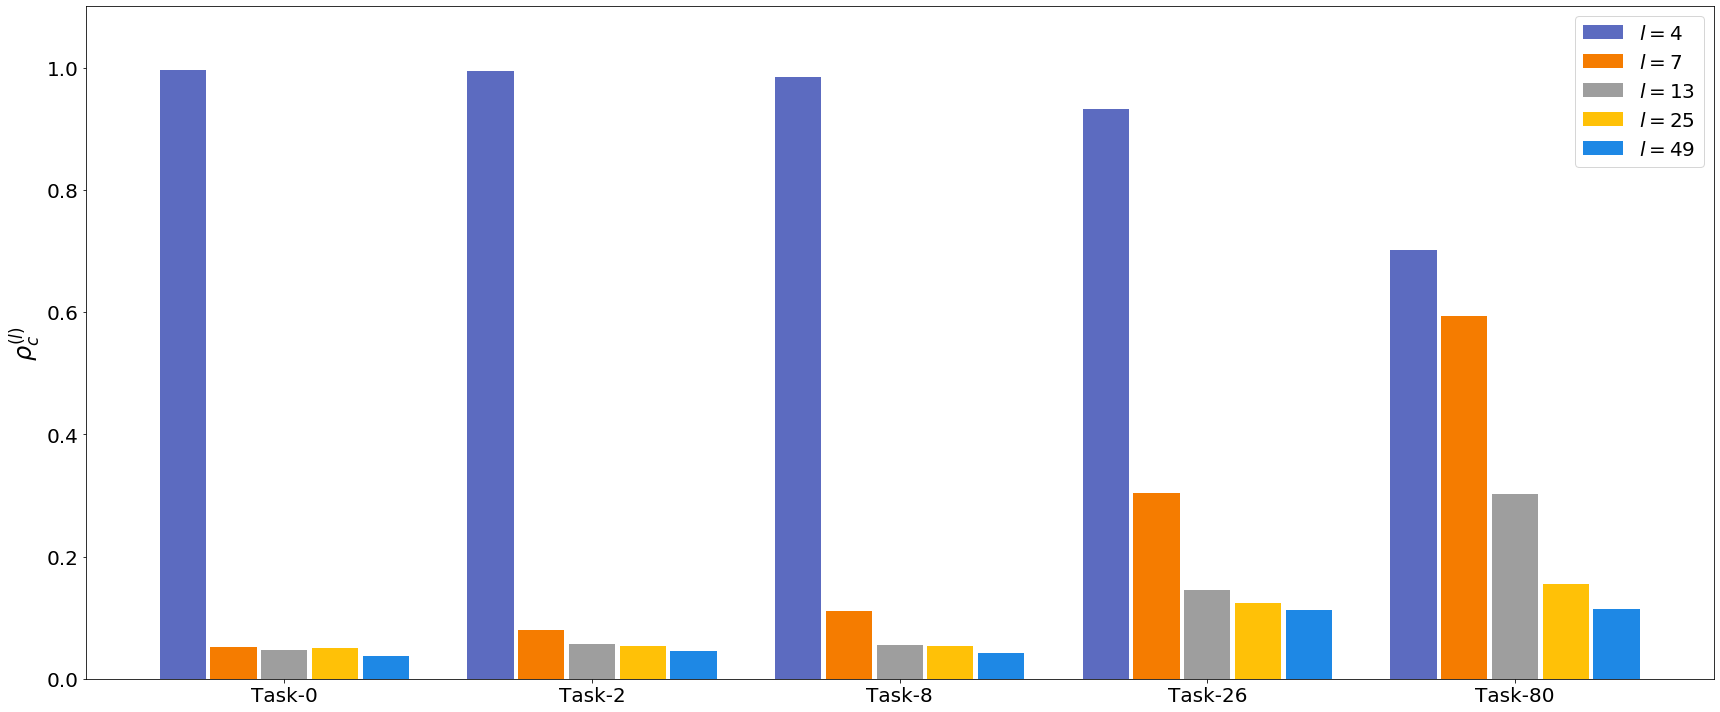

In [4]:
bar_width = 0.15
tick_label = list(DATA.keys())
plt.figure(figsize=(24, 10))
x = np.arange(5)
colors = ["#5c6bc0", "#f57c00", "#9e9e9e", "#ffc107", "#1e88e5"]
plt.bar(x - 1.7 * bar_width, DATA_transpose[0], bar_width, color=colors[0], label=r"$l=4$")
plt.bar(x - 0.6 * bar_width, DATA_transpose[1], bar_width, color=colors[1], label=r"$l=7$")
plt.bar(x + 0.5 * bar_width, DATA_transpose[2], bar_width, color=colors[2], label=r"$l=13$")
plt.bar(x + 1.6 * bar_width, DATA_transpose[3], bar_width, color=colors[3], label=r"$l=25$")
plt.bar(x + 2.7 * bar_width, DATA_transpose[4], bar_width, color=colors[4], label=r"$l=49$")
plt.legend(fontsize=20)
plt.ylim([0, 1.1])
plt.xticks(x + bar_width / 2, tick_label, fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel(r"$\rho_c^{(l)}$", fontsize=24)
plt.tight_layout()
plt.show()